jax_dna_opt_diagram (1).svg

## Imports & Utils

In [1]:
#install from Github repo
!pip install git+https://github.com/rkruegs123/jax-dna.git
# Need to uninstall the current jax_md due to a version conflict
!pip uninstall -y jax_md
# install the latest version directly from GitHub
!pip install git+https://github.com/jax-md/jax-md.git
#!pip install --upgrade "jax[cuda]" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
!pip install ray

  Cloning https://github.com/rkruegs123/jax-dna.git to /tmp/pip-req-build-ps67q71r
  Running command git clone --filter=blob:none --quiet https://github.com/rkruegs123/jax-dna.git /tmp/pip-req-build-ps67q71r
  Resolved https://github.com/rkruegs123/jax-dna.git to commit 81aff40472f0046d5dc56131c6086b9762965c56
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.0/151.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.8/373.8 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.9/168.9 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 6.2 MB/s eta 0:00:00
  Created wheel for jax_dna: filename=jax_dna-0.1.dev1320+g81aff40-py3-none-a

Found existing installation: jax-md 0.2.8
Uninstalling jax-md-0.2.8:
  Successfully uninstalled jax-md-0.2.8
  Cloning https://github.com/jax-md/jax-md.git to /tmp/pip-req-build-crh3elax
  Running command git clone --filter=blob:none --quiet https://github.com/jax-md/jax-md.git /tmp/pip-req-build-crh3elax
  Resolved https://github.com/jax-md/jax-md.git to commit 3571f47bd37a4a1d316d68797ed16f52add5e743
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.0/809.0 kB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install wget
!wget https://raw.githubusercontent.com/rkruegs123/jax-dna/master/data/sys-defs/simple-helix/sys.top
!wget https://raw.githubusercontent.com/rkruegs123/jax-dna/master/data/sys-defs/simple-helix/bound_relaxed.conf


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=92f9493ca23ef4a747a776d52ac63c1de88b8d56987b273ccbc37c092a3eaa38
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget
--2025-04-28 18:10:47--  https://raw.githubusercontent.com/rkruegs123/jax-dna/master/data/sys-defs/simple-helix/sys.top
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 148 [text/plain]
Saving to: ‘sys.top’

sys.top             100%[===================>]     148  --.-KB/s    in 0s      

2025-04-28 18:10:47 (4.15 MB/s) - ‘sys.top’ saved [148/148]

--2025-04-28 18:10:47--  https://raw.githubusercontent.com/rkruegs123/jax-dna/master/data/sys-defs/simpl

In [3]:
import functools
import itertools
import logging
import os
from pathlib import Path
import typing
import jax
import jax.numpy as jnp
import jax_md
import optax
import sys
from tqdm import tqdm
import operator
import numpy as onp
import matplotlib.pyplot as plt

import jax_dna
import jax_dna.energy as jdna_energy
import jax_dna.energy.dna1 as dna1_energy
import jax_dna.energy.utils as jdna_utils
import jax_dna.input.toml as toml_reader
import jax_dna.input.tree as jdna_tree
import jax_dna.observables as jd_obs
import jax_dna.observables.pitch as pitch
import jax_dna.observables.propeller as propeller
import jax_dna.optimization.simulator as jdna_simulator
import jax_dna.optimization.objective as jdna_objective
import jax_dna.optimization.optimization as jdna_optimization
import jax_dna.simulators.oxdna as oxdna
import jax_dna.simulators.io as jdna_sio
import jax_dna.simulators.jax_md as jdna_jaxmd
import jax_dna.utils.types as jdna_types
from jax_dna.ui.loggers.logger import Logger
import jax_dna.ui.loggers.jupyter as jdna_jupyter
from jax_dna.input import topology, trajectory
import jax_dna.input.topology as jdna_top
import jax_dna.input.trajectory as jdna_traj
import jax_dna.utils.units as units
import jax_dna.utils.math as jd_math
import jax_dna.energy.base as je_base
import jax_dna.energy.configuration as config
import jax_dna.energy.dna1.base_smoothing_functions as bsf
import jax_dna.energy.dna1.interactions as dna1_interactions
import jax_dna.energy.dna1.base_functions as jd_base_functions
import jax_dna.energy.potentials as jdna_potentials




jax.config.update("jax_enable_x64", True)
#file_path = Path("../../../data/sys-defs/simple-helix")
file_path = Path(".")

In [4]:
##for generating plots

from google.colab import output
output.enable_custom_widget_manager()
from IPython.display import display, clear_output
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import time

##FIRST OPTIMIZATION
# Function to create and display figure
def update_plots(TARGET_PITCH, N_ITERS, grads=None):
    # Create figure with 2 subplots side by side
    fig = make_subplots(rows=2, cols=2,
                        subplot_titles=("Loss", "Pitch", "Largest gradients"),
                        specs=[
                          [{"type": "scatter"}, {"type": "scatter"}],  # First row: two separate plots
                          [{"type": "bar", "colspan": 2}, None]        # Second row: one wide plot
                        ],
                        vertical_spacing=0.15,
                        horizontal_spacing=0.2)

    # Add traces for each subplot
    fig.add_trace(go.Scatter(x=loss_x, y=loss_y, mode='lines+markers', name='Loss'),
                 row=1, col=1)

    fig.add_trace(go.Scatter(x=pitch_x, y=pitch_y, mode='lines+markers', name='Pitch'),
                 row=1, col=2)

    # Add target line
    fig.add_trace(
        go.Scatter(
            x=[-1, N_ITERS],
            y=[TARGET_PITCH, TARGET_PITCH],
            mode='lines',
            line=dict(color='red', width=2, dash='dash'),
            name='Target Pitch',
            showlegend=True
        ),
        row=1, col=2
    )
    # Add largest gradient values bar plot if data is available
    if grads:
        param_names = [name for name, _ in grads]
        param_values = [value for _, value in grads]

        fig.add_trace(
            go.Bar(
                x=param_names,
                y=param_values,
                text=[f"{v:.6f}" for v in param_values],
                textposition='auto',
                name='Gradient Value'
            ),
            row=2, col=1
        )

    fig.update_layout(
        autosize=False,
        width=900,
        height=700,  # Increased height to accommodate the new plot
        margin=dict(l=50, r=50, t=60, b=50),
    )

    # Set x-axis labels and ranges
    fig.update_xaxes(title_text="Iteration", range=[-1, N_ITERS], row=1, col=1)
    fig.update_xaxes(title_text="Iteration", range=[-1, N_ITERS], row=1, col=2)
    fig.update_xaxes(title_text="Parameter", row=2, col=1)

    # Set y-axis labels and ranges
    fig.update_yaxes(title_text="Loss (A.U.)", range=[0, 0.12], row=1, col=1)
    fig.update_yaxes(title_text="Pitch (bps/turn)", range=[9.5, 13.5], row=1, col=2)
    fig.update_yaxes(title_text="Gradient Value", row=2, col=1)

    # Clear previous output and display new figure
    clear_output(wait=True)
    display(fig)

def find_largest_differences(list_dict1, list_dict2, top_n=5):
    # Convert lists of dictionaries to dictionaries if needed
    if isinstance(list_dict1, list) and isinstance(list_dict2, list):
        # Assuming each list contains dictionaries that need to be combined
        dict1 = {}
        for d in list_dict1:
            dict1.update(d)

        dict2 = {}
        for d in list_dict2:
            dict2.update(d)
    else:
        # Already dictionaries
        dict1 = list_dict1
        dict2 = list_dict2

    # Create a dictionary to store the percentage differences
    differences = {}

    # Compute the percentage difference for each key
    for key in dict1:
        if key in dict2 and dict1[key] != 0:  # Avoid division by zero
            # Calculate percentage difference: (final - initial) / initial * 100
            differences[key] = abs((dict2[key] - dict1[key]) / dict1[key] * 100)

    # Sort the differences by value in descending order and get the top n
    top_keys = sorted(differences.items(), key=lambda x: x[1], reverse=True)[:top_n]

    return top_keys, dict1, dict2

def plot_top_differences(dict1, dict2, top_differences):
    # Extract keys from top differences
    keys = [item[0] for item in top_differences]

    # Get the values for these keys from both dictionaries
    values1 = [dict1[key] for key in keys]
    values2 = [dict2[key] for key in keys]
    percent_changes = [(dict2[key] - dict1[key]) / dict1[key] * 100 for key in keys]

    # Set up the plot
    x = onp.arange(len(keys))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 6))

    # Create the bars
    rects1 = ax.bar(x - width/2, values1, width, label='Initial Values')
    rects2 = ax.bar(x + width/2, values2, width, label='Final Values')

    # Add labels, title and legend
    ax.set_xlabel('Keys')
    ax.set_ylabel('Values')
    ax.set_title('Top 5 Parameters with Largest Percentage Differences')
    ax.set_xticks(x)
    ax.set_xticklabels(keys)
    ax.legend()

    # Add value labels on top of each bar with percentage change
    def autolabel(rects, values, percent_changes):
        for i, rect in enumerate(rects):
            height = rect.get_height()
            label = f'{values[i]:.2f}'
            if i < len(percent_changes) and rect in rects2:  # Only add % change to final values
                label += f'\n({percent_changes[i]:+.1f}%)'

            ax.annotate(label,
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1, values1, [])
    autolabel(rects2, values2, percent_changes)

    plt.tight_layout()
    plt.show()

##MULTI-OBJECTIVE LOSS DEMO

def update_dual_plots(TARGET_VALUE1, TARGET_VALUE2, N_ITERS, observable1_name="Pitch", observable2_name="Propeller Twist", observable1_units="bps/turn", observable2_units="rads"):
    # Create figure with 2x2 grid of subplots
    fig = make_subplots(rows=2, cols=2,
                        subplot_titles=(f"Loss for {observable1_name}",
                                       f"{observable1_name}",
                                       f"Loss for {observable2_name}",
                                       f"{observable2_name}"),
                        vertical_spacing=0.15,
                        horizontal_spacing=0.15)

    # Add traces for each subplot
    # First optimization - loss
    fig.add_trace(go.Scatter(x=loss1_x, y=loss1_y, mode='lines+markers', name=f'Loss ({observable1_name})'),
                 row=1, col=1)

    # First optimization - observable value
    fig.add_trace(go.Scatter(x=observable1_x, y=observable1_y, mode='lines+markers', name=observable1_name),
                 row=1, col=2)

    # Add target line for first observable
    fig.add_trace(
        go.Scatter(
            x=[-1, N_ITERS],
            y=[TARGET_VALUE1, TARGET_VALUE1],
            mode='lines',
            line=dict(color='red', width=2, dash='dash'),
            name=f'Target {observable1_name}',
            showlegend=True
        ),
        row=1, col=2
    )

    # Second optimization - loss
    fig.add_trace(go.Scatter(x=loss2_x, y=loss2_y, mode='lines+markers', name=f'Loss ({observable2_name})'),
                 row=2, col=1)

    # Second optimization - observable value
    fig.add_trace(go.Scatter(x=observable2_x, y=observable2_y, mode='lines+markers', name=observable2_name),
                 row=2, col=2)

    # Add target line for second observable
    fig.add_trace(
        go.Scatter(
            x=[-1, N_ITERS],
            y=[TARGET_VALUE2, TARGET_VALUE2],
            mode='lines',
            line=dict(color='red', width=2, dash='dash'),
            name=f'Target {observable2_name}',
            showlegend=True
        ),
        row=2, col=2
    )

    fig.update_layout(
        autosize=False,
        width=1000,
        height=800,
        margin=dict(l=50, r=50, t=60, b=50),
    )

    # Set x-axis labels and ranges
    fig.update_xaxes(title_text="Iteration", range=[-1, N_ITERS], row=1, col=1)
    fig.update_xaxes(title_text="Iteration", range=[-1, N_ITERS], row=1, col=2)
    fig.update_xaxes(title_text="Iteration", range=[-1, N_ITERS], row=2, col=1)
    fig.update_xaxes(title_text="Iteration", range=[-1, N_ITERS], row=2, col=2)

    # Set y-axis labels and ranges
    # You may need to adjust the y-ranges based on your expected data values
    fig.update_yaxes(title_text="Loss (A.U.)", row=1, col=1)
    fig.update_yaxes(title_text=f"{observable1_name} ({observable1_units})", row=1, col=2)
    fig.update_yaxes(title_text="Loss (A.U.)", row=2, col=1)
    fig.update_yaxes(title_text=f"{observable2_name} ({observable2_units})", row=2, col=2)

    # Clear previous output and display new figure
    clear_output(wait=True)
    display(fig)

###CUSTOM ENERGY LOSS DEMOS
def update_plots_dh(TARGET_VALUE, N_ITERS, observable_name="Pitch", observable_units="bps/turn"):
    # Create figure with 2 subplots side by side
    fig = make_subplots(rows=1, cols=2,
                       subplot_titles=("Loss", observable_name),
                       horizontal_spacing=0.2)

    # Add traces for each subplot
    fig.add_trace(go.Scatter(x=dh_loss_x, y=dh_loss_y, mode='lines+markers', name='Loss'),
                 row=1, col=1)

    fig.add_trace(go.Scatter(x=dh_observable_x, y=dh_observable_y, mode='lines+markers', name=observable_name),
                 row=1, col=2)

    # Add target line
    fig.add_trace(
        go.Scatter(
            x=[-1, N_ITERS],
            y=[TARGET_VALUE, TARGET_VALUE],
            mode='lines',
            line=dict(color='red', width=2, dash='dash'),
            name=f'Target {observable_name}',
            showlegend=True
        ),
        row=1, col=2
    )

    fig.update_layout(
        autosize=False,
        width=900,
        height=400,
        margin=dict(l=50, r=50, t=60, b=50),
    )

    # Set x-axis labels and ranges
    fig.update_xaxes(title_text="Iteration", range=[-1, N_ITERS], row=1, col=1)
    fig.update_xaxes(title_text="Iteration", range=[-1, N_ITERS], row=1, col=2)

    # Set y-axis labels and ranges
    fig.update_yaxes(title_text="Loss (A.U.)", row=1, col=1)
    fig.update_yaxes(title_text=f"{observable_name} ({observable_units})", row=1, col=2)

    # Clear previous output and display new figure
    clear_output(wait=True)
    display(fig)

def update_plots_mlp(TARGET_VALUE, N_ITERS, observable_name="Pitch", observable_units="bps/turn"):
    # Create figure with 2 subplots side by side
    fig = make_subplots(rows=1, cols=2,
                       subplot_titles=("Loss", observable_name),
                       horizontal_spacing=0.2)

    # Add traces for each subplot
    fig.add_trace(go.Scatter(x=mlp_loss_x, y=mlp_loss_y, mode='lines+markers', name='Loss'),
                 row=1, col=1)

    fig.add_trace(go.Scatter(x=mlp_observable_x, y=mlp_observable_y, mode='lines+markers', name=observable_name),
                 row=1, col=2)

    # Add target line
    fig.add_trace(
        go.Scatter(
            x=[-1, N_ITERS],
            y=[TARGET_VALUE, TARGET_VALUE],
            mode='lines',
            line=dict(color='red', width=2, dash='dash'),
            name=f'Target {observable_name}',
            showlegend=True
        ),
        row=1, col=2
    )

    fig.update_layout(
        autosize=False,
        width=900,
        height=400,
        margin=dict(l=50, r=50, t=60, b=50),
    )

    # Set x-axis labels and ranges
    fig.update_xaxes(title_text="Iteration", range=[-1, N_ITERS], row=1, col=1)
    fig.update_xaxes(title_text="Iteration", range=[-1, N_ITERS], row=1, col=2)

    # Set y-axis labels and ranges
    fig.update_yaxes(title_text="Loss (A.U.)", row=1, col=1)
    fig.update_yaxes(title_text=f"{observable_name} ({observable_units})", row=1, col=2)

    # Clear previous output and display new figure
    clear_output(wait=True)
    display(fig)


In [5]:
def write_to_file(
    filepath: jdna_types.PathOrStr,
    traj: jdna_sio.SimulatorTrajectory,
    print_every: int) -> None:
    """Write a jaxDNA simulation trajectory to oxDNA file format for visualization purposes."""
    num_nucs = len(traj.rigid_body.center[0])
    v = jnp.zeros((num_nucs, 3)) #dummy velocity for now
    L = jnp.zeros((num_nucs, 3)) #dummy angular momentum for now
    #FIXME: SimulatorTrajectory only stores every print_conf_interval snapshots. Need to multiply t by print_conf_interval, read from the oxDNA input file
    with open(filepath, "w") as f:
        for i in jnp.arange(0, traj.length(), print_every):
            f.write(f"t = {i}\n")
            f.write("b = 50. 50. 50.\n")
            f.write("E = 0. 0. 0.\n")

            coms = traj.rigid_body.center[i]
            bb_vecs = jdna_utils.q_to_back_base(traj.rigid_body.orientation[i])
            base_norms = jdna_utils.q_to_base_normal(traj.rigid_body.orientation[i])

            rows = jnp.hstack((coms, bb_vecs, base_norms, v, L))
            for row in rows:
                f.write(' '.join(map(str, row)) + '\n')

# SIMULATOR

#### Set up MD simulator

In [6]:
sim_config = {
    "n_steps": 5_000,
    "kT": 293.15,
    "dt": 0.003,
}

#load system topology and initial position

top = jdna_top.from_oxdna_file(file_path / "sys.top") #load topology
initial_positions = ( #load trajectory
    jdna_traj.from_file(
        file_path / "bound_relaxed.conf",
        top.strand_counts,
        is_oxdna=False,
    )
    .states[0]
    .to_rigid_body()
)

default_sim_params, default_model_params = dna1_energy.default_configs()

dt = sim_config["dt"]
kT = units.get_kt(sim_config["kT"])
diff_coef = default_sim_params["diff_coef"]
rot_diff_coef = default_sim_params["rot_diff_coef"]
gamma = jax_md.rigid_body.RigidBody(
    center=jnp.array([kT / diff_coef], dtype=jnp.float64),
    orientation=jnp.array([kT / rot_diff_coef], dtype=jnp.float64),
)
mass = jax_md.rigid_body.RigidBody(
    center=jnp.array([default_sim_params["nucleotide_mass"]], dtype=jnp.float64),
    orientation=jnp.array([default_sim_params["moment_of_inertia"]], dtype=jnp.float64),
)
geometry = default_model_params["geometry"]
transform_fn = functools.partial(
    dna1_energy.Nucleotide.from_rigid_body,
    com_to_backbone=geometry["com_to_backbone"],
    com_to_hb=geometry["com_to_hb"],
    com_to_stacking=geometry["com_to_stacking"],
)

# The jax_md simulator needs an energy function. We can use the default
# energy functions and configurations for dna1 simulations. For more
# information on energy functions and configurations, see the documentation.
energy_fn_configs = dna1_energy.default_energy_configs()
params = [{} for _ in range(len(energy_fn_configs))] #empty dictionaries as we won't override any default parameters
energy_fns = dna1_energy.default_energy_fns()

energy_fn_builder_fn = jdna_energy.energy_fn_builder(
        energy_fns=energy_fns,
        energy_configs=energy_fn_configs,
        transform_fn=transform_fn,
)

def energy_fn_builder(params: jdna_types.Params) -> callable:
      return jax.vmap(
          lambda trajectory: energy_fn_builder_fn(params)(
              trajectory.rigid_body,
              seq=jnp.array(top.seq),
              bonded_neighbors=top.bonded_neighbors,
              unbonded_neighbors=top.unbonded_neighbors.T,
          )
      )

simulator = jdna_jaxmd.JaxMDSimulator(
    energy_configs=energy_fn_configs,
    energy_fns=energy_fns,
    topology=top,
    simulator_params=jdna_jaxmd.StaticSimulatorParams(
        seq=jnp.array(top.seq),
        mass=mass,
        bonded_neighbors=top.bonded_neighbors,
        checkpoint_every = 100,
        dt=dt,
        kT=kT,
        gamma=gamma,
    ),
    space=jax_md.space.free(),
    transform_fn=transform_fn,
    simulator_init=jax_md.simulate.nvt_langevin,
    neighbors=jdna_jaxmd.NoNeighborList(unbonded_nbrs=top.unbonded_neighbors),
)

key = jax.random.PRNGKey(0)
sim_fn = jax.jit(lambda opts: simulator.run(opts, initial_positions, sim_config["n_steps"], key))


#### Run simulation

In [7]:
print("Running simulation...")

trajectory = sim_fn(params)

print("Simulation Complete! ✅ Trajectory length:", trajectory.rigid_body.center.shape[0])

write_to_file("trajectory.dat", trajectory, print_every=100)

Running simulation...
Simulation Complete! ✅ Trajectory length: 5000


# OBJECTIVE


## Setup

In [8]:
cwd = Path(os.getcwd())
output_dir = cwd / "basic_trajectory"
trajectory_loc = output_dir / "trajectory.pkl"
if not output_dir.exists():
      output_dir.mkdir(parents=True, exist_ok=True)

def simulator_fn(
      params: jdna_types.Params,
      meta: jdna_types.MetaData,
  ) -> tuple[str, str]:
      in_key=meta["key"]
      in_key, subkey = jax.random.split(in_key)
      traj = simulator.run(params, initial_positions, sim_config["n_steps"], subkey)
      traj_pruned = traj.slice(0)
      for i in range(1, traj.length(), 100):
          traj_pruned = traj_pruned + traj.slice(i)
      jdna_tree.save_pytree(traj_pruned, trajectory_loc)
      return [trajectory_loc]

obs_trajectory = "trajectory"
key = jax.random.PRNGKey(1234)
trajectory_simulator = jdna_simulator.BaseSimulator(
      name="jaxmd-sim",
      fn=simulator_fn,
      exposes = [obs_trajectory],
      meta_data = {"key": key},
  )

opt_params = []
for ec in energy_fn_configs:
    opt_params.append(
        ec.opt_params #if isinstance(ec, dna1_energy.StackingConfiguration) else {}
      )

##except these weights, which are used for sequence optimizations
for op in opt_params:
  if "ss_stack_weights" in op:
    del op["ss_stack_weights"]
  elif "ss_hb_weights" in op:
    del op["ss_hb_weights"]

## Example: pitch

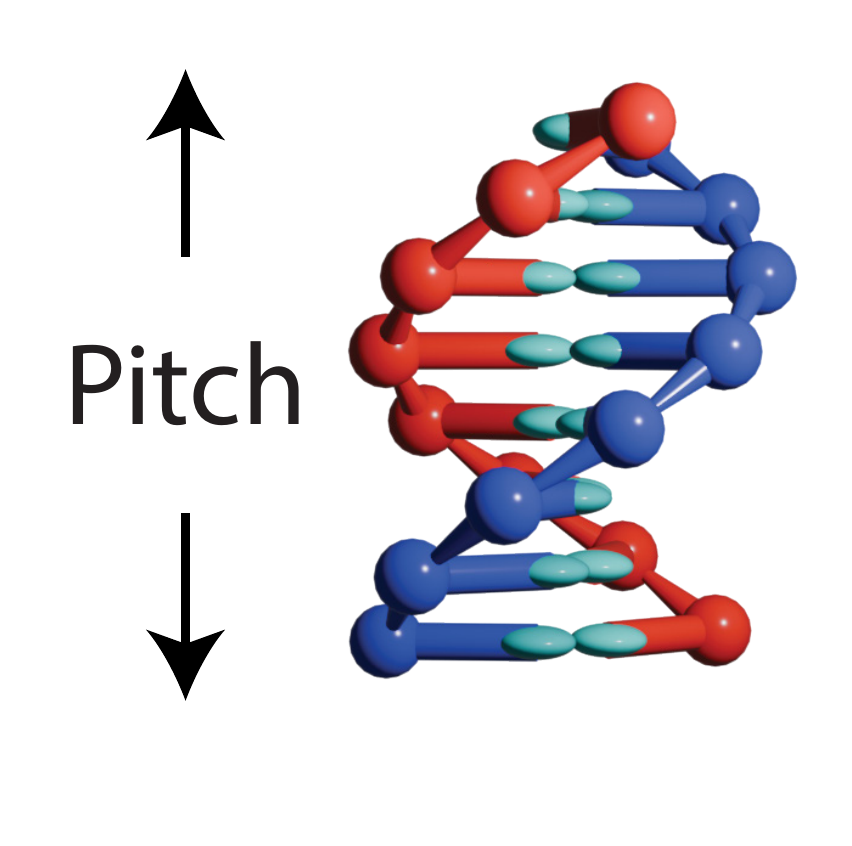

In [9]:
TARGET_NUM_BPS_PER_TURN = 11.
TARGET_PITCH = 2.0*jnp.pi/TARGET_NUM_BPS_PER_TURN

pitch_fn = pitch.PitchAngle(rigid_body_transform_fn=transform_fn,
          quartets=jnp.array([[[2,13],[3,12]],[[3,12],[4,11]],[[4,11],[5,10]]]), # we consider only the inner basepairs to eliminate the effect of fraying
          displacement_fn=jax_md.space.free()[0])

def pitch_loss_fn(
    traj: jax_md.rigid_body.RigidBody,
    weights: jnp.ndarray,
    energy_model: jdna_energy.base.ComposedEnergyFunction,
) -> tuple[float, tuple[str, typing.Any]]:
    obs = pitch_fn(traj)
    expected_pitch = jnp.dot(weights, obs)
    loss = (expected_pitch - TARGET_PITCH)**2
    loss = jnp.sqrt(loss)
    return loss, (("pitch", expected_pitch), {})

pitch_objective = jdna_objective.DiffTReObjective(
    name = "DiffTRe",
    required_observables = [obs_trajectory],
    needed_observables = [obs_trajectory],
    logging_observables = ["loss", "pitch", "gradients"],
    grad_or_loss_fn = pitch_loss_fn,
    energy_fn_builder = energy_fn_builder,
    opt_params = opt_params,
    min_n_eff_factor = 0.95,
    beta = jnp.array(1/kT),
    n_equilibration_steps = 0,
)

# OPTIMIZER

In [12]:
##set up optimization parameters
opt_config = {
        "n_opt_steps": 25, #how many optimization steps to run for
        "learning_rate": 0.002, #for use with optimizer
}

opt = jdna_optimization.SimpleOptimizer(
    objective=pitch_objective,
    simulator=trajectory_simulator,
    optimizer = optax.rmsprop(learning_rate=opt_config["learning_rate"]),
)

/usr/local/lib/python3.11/dist-packages/jax_dna/ui/loggers/logger.py:33: UserWarning:

`log_dir` not results might not be saved to disk.



In [ ]:
# Initialize data storage
loss_x = []
loss_y = []
pitch_x = []
pitch_y = []

init_params = opt_params
for i in tqdm(range(opt_config["n_opt_steps"])):
        opt_state, opt_params, grads = opt.step(opt_params)
        if i % 1 == 0:
            log_values = pitch_objective.logging_observables()
            for (name, value) in log_values:
                if 'loss' in name.lower():
                    loss_value = value
                if 'pitch' in name.lower():
                    pitch_value = value
                print(f"{i}::{name}={value}")

           # Store data points
            loss_x.append(i)
            loss_y.append(loss_value)
            pitch_x.append(i)
            pitch_y.append(2*jnp.pi/pitch_value)

            flat_params = {}
            for section in grads:
                if isinstance(section, dict):
                    for key, value in section.items():
                        if hasattr(value, 'item'):
                            flat_params[key] = abs(float(value))

            # Get top 6 gradients by absolute value
            current_sorted_grads = sorted(flat_params.items(), key=lambda x: abs(x[1]), reverse=True)[:6]

            # Update the plots
            update_plots(TARGET_PITCH=TARGET_NUM_BPS_PER_TURN, N_ITERS=opt_config["n_opt_steps"],grads=current_sorted_grads)
            time.sleep(0.2)

        opt = opt.post_step(
            optimizer_state=opt_state,
            opt_params=opt_params,
        )
final_params = opt_params

 24%|██▍       | 6/25 [03:52<12:16, 38.74s/it]


### Compare initial and final parameter values

In [ ]:
top_differences, dict1, dict2 = find_largest_differences(init_params, final_params)
print("Top 5 parameter changes:")
for key, diff in top_differences:
    print(f"Key: {key}, Percentage Difference: {diff:.2f}%")

# Plot the top differences
plot_top_differences(dict1, dict2, top_differences)

# CUSTOM ENERGY FUNCTIONS

## Debye-Huckel Electrostatics

$V_{DH} = \alpha \Sigma_{ij} q_{\text{eff}}^2 \frac{\exp{-r_{ij} / \lambda_{DH}(T,I)}}{r_{ij}}$


with

$\lambda_{DH}(T,I) = \delta\sqrt{\frac{k_BT}{I}}$

### Setup

In [ ]:
"""Debye-Huckel custom energy function to add on to the DNA1 model."""

import dataclasses as dc

import chex
import jax.numpy as jnp
import numpy as np
from typing_extensions import override

import jax_dna.energy.base as je_base
import jax_dna.energy.configuration as config
import jax_dna.energy.dna1.base_smoothing_functions as bsf
import jax_dna.energy.dna1.interactions as dna1_interactions
import jax_dna.utils.math as jd_math
import jax_dna.utils.types as typ

LAMBDA_PREFACTOR = 0.3616455*jnp.sqrt(10.) #from oxDNA defs in DNA2Interaction.cpp
DH_PREFACTOR = 0.0543 / (0.815 * 0.815) #from oxDNA defs

def _solve_DH_B(q: typ.Scalar, eta: typ.Scalar, lambda_DH: typ.Scalar) -> typ.Scalar:
    """Solve for the smoothing parameter B in the Debye-Huckel smoothing function."""
    return q**2 * eta / (27. * lambda_DH**2 * jnp.exp(3))


def _solve_DH_rcut(lambda_DH: typ.Scalar) -> typ.Scalar:
    """Solve for the smoothing parameter r_cut in the Debye-Huckel smoothing function."""
    return 6. * lambda_DH

def get_DH_smoothing_params(q: typ.Scalar, eta: typ.Scalar, lambda_DH: typ.Scalar) -> tuple[typ.Scalar, typ.Scalar]:
    """Get the smoothing parameters for the Debye-Huckel smoothing function."""
    solved_B = _solve_DH_B(q, eta, lambda_DH)
    solved_rcut = _solve_DH_rcut(lambda_DH)

    return solved_B, solved_rcut

def v_debye_huckel(r: jdna_types.ARR_OR_SCALAR, DH_prefactor: jdna_types.Scalar, lambda_DH: jdna_types.Scalar) -> jdna_types.ARR_OR_SCALAR:
    """Debye-huckel potential. Based on equation A.2 in Ben Snodin's DPhil thesis."""
    return DH_prefactor * jnp.exp(-r/lambda_DH) / r

def v_debye_huckel_smooth(
    r: jdna_types.ARR_OR_SCALAR,
    qeff: jdna_types.Scalar,
    B_smooth: jdna_types.Scalar,
    r_cut: jdna_types.Scalar,
    lambda_DH: jdna_types.Scalar,
    r_smooth: jdna_types.Scalar,
    dh_prefactor: jdna_types.Scalar,
) -> jdna_types.ARR_OR_SCALAR:
    """Smoothed version of the Debye-Huckel potential."""
    coeff = dh_prefactor * qeff * qeff


    return jnp.where(
        r > r_cut,
        0.0,  # Case 1: r > r_cut → return 0
        jnp.where(
            r > r_smooth,
            jdna_potentials.v_smooth(r, B_smooth, r_cut),  # Case 2: r_smooth < r < r_cut → return V_smooth
            v_debye_huckel(r, coeff, lambda_DH)   # Case 3: r < r_smooth → return V_debye_huckel
        )
    )

@chex.dataclass(frozen=True)
class DebyeHuckelConfiguration(config.BaseConfiguration):
    """Configuration for the Debye-Huckel energy function."""

    # independent parameters
    qeff: float | None = None
    kt: float | None = None
    salt_I: float | None = None

    # dependent parameters
    B_smooth: float | None = None
    r_cut: float | None = None
    lambda_DH: float | None = None
    r_smooth: float | None = None

    required_params: tuple[str] = (
        "qeff",
        "kt",
        "salt_I",
    )

    dependent_params: tuple[str] = (
        "B_smooth",
        "r_cut",
        "lambda_DH",
        "r_smooth",
    )

    @override
    def init_params(self) -> "DebyeHuckelConfiguration":
        _lambda_DH = LAMBDA_PREFACTOR * jnp.sqrt(self.kt / self.salt_I)
        _r_smooth = 3. * _lambda_DH

        _B, _r_cut = get_DH_smoothing_params(
            self.qeff,
            DH_PREFACTOR,
            _lambda_DH,
        )

        return self.replace(
            B_smooth=_B,
            r_cut=_r_cut,
            lambda_DH = _lambda_DH,
            r_smooth = _r_smooth,
        )


@chex.dataclass(frozen=True)
class DebyeHuckel(je_base.BaseEnergyFunction):
    """Debye-Huckel energy function for adding electrostatics to the DNA1 model."""

    params: DebyeHuckelConfiguration

    def pairwise_energies(
        self,
        body_i: je_base.BaseNucleotide,
        body_j: je_base.BaseNucleotide,
        unbonded_neighbors: jdna_types.Arr_Unbonded_Neighbors_2,
    ) -> jdna_types.Arr_Unbonded_Neighbors:
        """Computes the Debye-Huckel electrostatic energy for each unbonded (i.e. non-neighbor) pair."""
        op_i = unbonded_neighbors[0]
        op_j = unbonded_neighbors[1]

        mask = jnp.array(op_i < body_i.center.shape[0], dtype=jnp.float32)

        dr_bb_op = self.displacement_mapped(body_j.back_sites[op_j], body_i.back_sites[op_i])
        r_bb_op = jnp.linalg.norm(dr_bb_op, axis=1) #distance between backbone sites, where we place the charge

        debye_huckel_dg = v_debye_huckel_smooth(
            r_bb_op,
            self.params.qeff,
            self.params.B_smooth,
            self.params.r_cut,
            self.params.lambda_DH,
            self.params.r_smooth,
            DH_PREFACTOR,
        )
        return jnp.where(mask, debye_huckel_dg, 0.0)  # Mask for neighbors

    @override
    def __call__(
        self,
        body: je_base.BaseNucleotide,
        seq: jdna_types.Sequence,
        bonded_neighbors: jdna_types.Arr_Bonded_Neighbors_2,
        unbonded_neighbors: jdna_types.Arr_Unbonded_Neighbors_2,
    ) -> jdna_types.Scalar:
        dgs = self.pairwise_energies(body, body, unbonded_neighbors)
        return dgs.sum()

### Optimization

In [ ]:
DebyeHuckel_train_config = {
        "n_sim_steps": 5_000,
        "n_opt_steps": 50,
        "learning_rate": 10.,
    }

TARGET_NUM_BPS_PER_TURN = 10.34
TARGET_PITCH = 2.0*jnp.pi/TARGET_NUM_BPS_PER_TURN #imagine we have a salt-dependent pitch value we want to match

#get default simulation configuration and energy configuration values
dh_energy_fns = dna1_energy.default_energy_fns()
dh_energy_fn_configs = dna1_energy.default_energy_configs()

# create Debye-Huckel configuration
dh_params = {
    "qeff": 0.815,
    "kt": sim_config["kT"],
    "salt_I": 0.15
}
dh_config = DebyeHuckelConfiguration.from_dict(
    dh_params,
    params_to_optimize=("qeff",)
    ).init_params()

# Append to the energy configs and functions
dh_energy_fn_configs.append(dh_config)
dh_energy_fns.append(DebyeHuckel)

#we'll only optimize the q_eff
opt_params = []
for ec in dh_energy_fn_configs:
    if isinstance(ec, DebyeHuckelConfiguration):
        opt_params.append(ec.opt_params)
    else:
        opt_params.append({})

print("optimizing parameters: ",opt_params)


dh_energy_fn_builder_fn = jdna_energy.energy_fn_builder(
    energy_fns=dh_energy_fns,
    energy_configs=dh_energy_fn_configs,
    transform_fn=transform_fn,
)

def dh_energy_fn_builder(params: jdna_types.Params) -> callable:
    return jax.vmap(
        lambda trajectory: dh_energy_fn_builder_fn(params)(
            trajectory.rigid_body,
            seq=jnp.array(top.seq),
            bonded_neighbors=top.bonded_neighbors,
            unbonded_neighbors=top.unbonded_neighbors.T,
        )
    )

cwd = Path(os.getcwd())
output_dir = cwd / "dh_trajectory"
trajectory_loc = output_dir / "trajectory.pkl"
if not output_dir.exists():
    output_dir.mkdir(parents=True, exist_ok=True)

dh_simulator = jdna_jaxmd.JaxMDSimulator(
    energy_configs=dh_energy_fn_configs,
    energy_fns=dh_energy_fns,
    topology=top,
    simulator_params=jdna_jaxmd.StaticSimulatorParams(
        seq=jnp.array(top.seq),
        mass=mass,
        bonded_neighbors=top.bonded_neighbors,
        checkpoint_every = 100,
        dt=dt,
        kT=kT,
        gamma=gamma,
    ),
    space=jax_md.space.free(),
    transform_fn=transform_fn,
    simulator_init=jax_md.simulate.nvt_langevin,
    neighbors=jdna_jaxmd.NoNeighborList(unbonded_nbrs=top.unbonded_neighbors),
)

def simulator_fn(
    params: jdna_types.Params,
    meta: jdna_types.MetaData,
) -> tuple[str, str]:
    in_key=meta["key"]
    in_key, subkey = jax.random.split(in_key)
    traj = dh_simulator.run(params, initial_positions, DebyeHuckel_train_config["n_sim_steps"], subkey)
    jdna_tree.save_pytree(traj, trajectory_loc)
    return [trajectory_loc]

obs_trajectory = "trajectory"

key = jax.random.PRNGKey(1234)
trajectory_simulator = jdna_simulator.BaseSimulator(
    name="jaxmd-sim",
    fn=simulator_fn,
    exposes = [obs_trajectory],
    meta_data = {"key": key},
)

pitch_fn = pitch.PitchAngle(rigid_body_transform_fn=transform_fn,
        quartets=jnp.array([[[2,13],[3,12]],[[3,12],[4,11]],[[4,11],[5,10]]]), # we consider only the inner basepairs to eliminate the effect of fraying
        displacement_fn=jax_md.space.free()[0])

def pitch_loss_fn(
    traj: jax_md.rigid_body.RigidBody,
    weights: jnp.ndarray,
    energy_model: jdna_energy.base.ComposedEnergyFunction,
) -> tuple[float, tuple[str, typing.Any]]:
    obs = pitch_fn(traj)
    expected_pitch = jnp.dot(weights, obs)
    loss = (expected_pitch - TARGET_PITCH)**2
    loss = jnp.sqrt(loss)
    return loss, (("pitch", expected_pitch), {})

dh_pitch_objective = jdna_objective.DiffTReObjective(
    name = "DiffTRe",
    required_observables = [obs_trajectory],
    needed_observables = [obs_trajectory],
    logging_observables = ["loss", "pitch"],
    grad_or_loss_fn = pitch_loss_fn,
    energy_fn_builder = dh_energy_fn_builder,
    opt_params = opt_params,
    min_n_eff_factor = 0.85,
    beta = jnp.array(1/kT),
    n_equilibration_steps = 0, # periodic steps are already in oxdna
)

dh_opt = jdna_optimization.SimpleOptimizer(
    objective=dh_pitch_objective,
    simulator=trajectory_simulator,
    optimizer = optax.adam(learning_rate=1e-3),
)

dh_loss_x = []
dh_loss_y = []
dh_observable_x = []
dh_observable_y = []

for i in range(DebyeHuckel_train_config["n_opt_steps"]):
    opt_state, opt_params, grads = dh_opt.step(opt_params)
    print("grads: ",grads[-1]["qeff"])
    print("q_eff: ",opt_params[-1]["qeff"])
    if i % 1 == 0:
        log_values = dh_pitch_objective.logging_observables()
        for (name, value) in log_values:
            print(f"step {i}::{name}={value}")
            if 'loss' in name.lower():
              dh_loss_x.append(i)
              dh_loss_y.append(value)
            if 'pitch' in name.lower():
              dh_observable_x.append(i)
              dh_observable_y.append(2.*jnp.pi/value)
            # Update the plots

        update_plots_dh(TARGET_VALUE=TARGET_NUM_BPS_PER_TURN, N_ITERS=DebyeHuckel_train_config["n_opt_steps"])
        time.sleep(0.2)

    dh_opt = dh_opt.post_step(
        optimizer_state=opt_state,
        opt_params=opt_params,
    )


## Neural network energy

### Setup

In [ ]:
"""Neural network energy function implementation for DNA1 model."""

from typing import Dict, Any, Callable, Tuple
from typing_extensions import override

import chex
import jax
import jax.numpy as jnp
import flax.linen as nn

import jax_dna.energy.base as je_base
import jax_dna.energy.configuration as config
import jax_dna.utils.types as jdna_types
import jax_md.rigid_body as rigid_body


@chex.dataclass(frozen=True)
class NeuralEnergyConfiguration(config.BaseConfiguration):
    """Configuration for the neural network energy function."""

    # Temperature and salt concentration
    kt: float | None = None
    salt_I: float | None = None

    # MLP weights and biases as flat dictionaries
    dense1_w: jnp.ndarray | None = None  # shape: (114, 8)
    dense1_b: jnp.ndarray | None = None  # shape: (8,)
    dense2_w: jnp.ndarray | None = None  # shape: (8, 8)
    dense2_b: jnp.ndarray | None = None  # shape: (8,)
    dense3_w: jnp.ndarray | None = None  # shape: (8, 1)
    dense3_b: jnp.ndarray | None = None  # shape: (1,)

    required_params: tuple[str] = (
        "kt",
        "salt_I",
        "dense1_w",
        "dense1_b",
        "dense2_w",
        "dense2_b",
        "dense3_w",
        "dense3_b",
    )

    non_optimizable_required_params: tuple[str] = (
        "kt",
        "salt_I",
    )
    @override
    def init_params(self) -> "NeuralEnergyConfiguration":
        """Initialize any dependent parameters."""
        return self


@chex.dataclass(frozen=True)
class NeuralEnergy(je_base.BaseEnergyFunction):
    """Neural network energy function for DNA1 model."""

    params: NeuralEnergyConfiguration

    def prepare_input(
        self,
        body: jax_md.rigid_body.RigidBody,

    ) -> jnp.ndarray:
        """Extract features from the rigid body configuration.
        - Temperature (kt)
        - Salt concentration
        - Center coordinates of rigid body
        - Orientation vector
        """
        # Combine features
        features = jnp.concatenate([
            jnp.reshape(jnp.array([self.params.kt, self.params.salt_I]), (-1,)),
            jnp.reshape(body.center, (-1,)),
            jnp.reshape(body.orientation.vec, (-1))
        ])
        return features

    def apply_mlp(
        self,
        x: jnp.ndarray,
        w1: jnp.ndarray,
        b1: jnp.ndarray,
        w2: jnp.ndarray,
        b2: jnp.ndarray,
        w3: jnp.ndarray,
        b3: jnp.ndarray
    ) -> jnp.ndarray:
        """Apply a 2-hidden-layer MLP with given weights and biases."""
        # First hidden layer
        x = jnp.dot(x, w1) + b1
        x = jax.nn.relu(x)

        # Second hidden layer
        x = jnp.dot(x, w2) + b2
        x = jax.nn.relu(x)

        # Output layer
        x = jnp.dot(x, w3) + b3
        return x.squeeze()

    def energy_fn(
        self,
        body: jax_md.rigid_body.RigidBody
    ) -> jdna_types.Scalar:
        """Compute energy for a given rigid body."""
        # Prepare input features
        x = self.prepare_input(body)

        # Apply MLP with the provided weights and biases
        energy = self.apply_mlp(
            x,
            self.params.dense1_w, self.params.dense1_b,
            self.params.dense2_w, self.params.dense2_b,
            self.params.dense3_w, self.params.dense3_b
        )
        return energy

    @override
    def __call__(
        self,
        body: jax_md.rigid_body.RigidBody,
        seq: jdna_types.Sequence,
        bonded_neighbors: jdna_types.Arr_Bonded_Neighbors_2,
        unbonded_neighbors: jdna_types.Arr_Unbonded_Neighbors_2,
    ) -> jdna_types.Scalar:
        """Compute the energy using the neural network model."""
        return self.energy_fn(body)



### Optimization

In [ ]:
mlp_energy_fns = dna1_energy.default_energy_fns()
mlp_energy_fn_configs = dna1_energy.default_energy_configs()

mlp_train_config = {
        "n_sim_steps": 1_000,
        "n_opt_steps": 200,
        "learning_rate": 0.1,
        "kt": sim_config["kT"],
        "salt_I": 0.15
    }

#TARGET_NUM_BPS_PER_TURN=11.
TARGET_NUM_BPS_PER_TURN=9.97
TARGET_PITCH = 2.0*jnp.pi/TARGET_NUM_BPS_PER_TURN

key= jax.random.PRNGKey(seed=42)
keys = jax.random.split(key, 6)
scale=0.01
mlp_params = {
    "dense1_w": scale*jax.random.normal(keys[0], shape=(114, 8)),
    "dense1_b": scale*jax.random.normal(keys[0], shape=(8,)),
    "dense2_w": scale*jax.random.normal(keys[0], shape=(8, 8)),
    "dense2_b": scale*jax.random.normal(keys[0], shape=(8,)),
    "dense3_w": scale*jax.random.normal(keys[0], shape=(8, 1)),
    "dense3_b": scale*jax.random.normal(keys[0], shape=(1,)),
    "kt": mlp_train_config["kt"],
    "salt_I": mlp_train_config["salt_I"]
}



mlp_config = NeuralEnergyConfiguration.from_dict(
    mlp_params,
    params_to_optimize=("dense1_w","dense1_b","dense2_w","dense2_b","dense3_w","dense3_b")
    ).init_params()

# Append to the energy configs and functions
mlp_energy_fn_configs.append(mlp_config)
mlp_energy_fns.append(NeuralEnergy)

opt_params = []
for ec in mlp_energy_fn_configs:
    if isinstance(ec, NeuralEnergyConfiguration):
        opt_params.append(ec.opt_params)
    else:
        opt_params.append({})

print(f"Optimizing parameters:")
for i, param_dict in enumerate(opt_params):
    if param_dict:
      print(list(param_dict.keys()))

# Create the energy function builder
mlp_energy_fn_builder_fn = jdna_energy.energy_fn_builder(
    energy_fns=mlp_energy_fns,
    energy_configs=mlp_energy_fn_configs,
    transform_fn=transform_fn,
)

def mlp_energy_fn_builder(params: jdna_types.Params) -> callable:
    return jax.vmap(
        lambda trajectory: mlp_energy_fn_builder_fn(params)(
            trajectory.rigid_body,
            seq=jnp.array(top.seq),
            bonded_neighbors=top.bonded_neighbors,
            unbonded_neighbors=top.unbonded_neighbors.T,
        )
    )

##Define simulator
cwd = Path(os.getcwd())
output_dir = cwd / "mlp_trajectory"
trajectory_loc = output_dir / "trajectory.pkl"
if not output_dir.exists():
    output_dir.mkdir(parents=True, exist_ok=True)

mlp_simulator = jdna_jaxmd.JaxMDSimulator(
    energy_configs=mlp_energy_fn_configs,
    energy_fns=mlp_energy_fns,
    topology=top,
    simulator_params=jdna_jaxmd.StaticSimulatorParams(
        seq=jnp.array(top.seq),
        mass=mass,
        bonded_neighbors=top.bonded_neighbors,
        checkpoint_every = 100,
        dt=dt,
        kT=kT,
        gamma=gamma,
    ),
    space=jax_md.space.free(),
    transform_fn=transform_fn,
    simulator_init=jax_md.simulate.nvt_langevin,
    neighbors=jdna_jaxmd.NoNeighborList(unbonded_nbrs=top.unbonded_neighbors),
)

def simulator_fn(
    params: jdna_types.Params,
    meta: jdna_types.MetaData,
) -> tuple[str, str]:
    in_key=meta["key"]
    in_key, subkey = jax.random.split(in_key)
    traj = mlp_simulator.run(params, initial_positions, mlp_train_config["n_sim_steps"], subkey)
    jdna_tree.save_pytree(traj, trajectory_loc)
    return [trajectory_loc]

obs_trajectory = "trajectory"

key = jax.random.PRNGKey(1234)
trajectory_simulator = jdna_simulator.BaseSimulator(
    name="jaxmd-sim",
    fn=simulator_fn,
    exposes = [obs_trajectory],
    meta_data = {"key": key},
)

pitch_fn = pitch.PitchAngle(rigid_body_transform_fn=transform_fn,
        quartets=jnp.array([[[2,13],[3,12]],[[3,12],[4,11]],[[4,11],[5,10]]]), # we consider only the inner basepairs to eliminate the effect of fraying
        displacement_fn=jax_md.space.free()[0])

def pitch_loss_fn(
    traj: jax_md.rigid_body.RigidBody,
    weights: jnp.ndarray,
    energy_model: jdna_energy.base.ComposedEnergyFunction,
) -> tuple[float, tuple[str, typing.Any]]:
    obs = pitch_fn(traj)
    expected_pitch = jnp.dot(weights, obs)
    loss = (expected_pitch - TARGET_PITCH)**2
    loss = jnp.sqrt(loss)
    return loss, (("pitch", expected_pitch), {})

mlp_pitch_objective = jdna_objective.DiffTReObjective(
    name = "DiffTRe",
    required_observables = [obs_trajectory],
    needed_observables = [obs_trajectory],
    logging_observables = ["loss", "pitch"],
    grad_or_loss_fn = pitch_loss_fn,
    energy_fn_builder = mlp_energy_fn_builder,
    opt_params = opt_params,
    min_n_eff_factor = 0.95,
    beta = jnp.array(1/kT),
    n_equilibration_steps = 0, # periodic steps are already in oxdna
)

mlp_opt = jdna_optimization.SimpleOptimizer(
    objective=mlp_pitch_objective,
    simulator=trajectory_simulator,
    optimizer = optax.adam(learning_rate=1e-3),
)


mlp_loss_x = []
mlp_loss_y = []
mlp_observable_x = []
mlp_observable_y = []

for i in range(mlp_train_config["n_opt_steps"]):
    opt_state, opt_params, grads = mlp_opt.step(opt_params)
    if i % 1 == 0:
        log_values = mlp_pitch_objective.logging_observables()
        for (name, value) in log_values:
            print(f"step {i}::{name}={value}")
            if 'loss' in name.lower():
              mlp_loss_x.append(i)
              mlp_loss_y.append(value)
            if 'pitch' in name.lower():
              mlp_observable_x.append(i)
              mlp_observable_y.append(2.*jnp.pi/value)

        # Update the plots
        update_plots_mlp(TARGET_VALUE=TARGET_NUM_BPS_PER_TURN, N_ITERS=mlp_train_config["n_opt_steps"])
        time.sleep(0.2)

    mlp_opt = mlp_opt.post_step(
        optimizer_state=opt_state,
        opt_params=opt_params,
    )
